# Blotto 13 Soldiers

In [1]:
from games.blotto import Blotto
import numpy as np
import matplotlib.pyplot as plt
from agents.random_agent import RandomAgent
from agents.fictitious_play import FictitiousPlay
from agents.regret_matching import RegretMatching
from utilities.utils import run_and_plot, plot_convergence_to_nash, plot_action_histogram, plot_action_trace_from_history
from utilities.utils import plot_dual_agent_simplex, compute_empirical_distributions

In [2]:
#initialize game
game = Blotto(13,3)
game.reset()

#print game information
agents = game.agents
moves = game._moves
num_action = game._num_actions
action_spaces = game.action_spaces
observation_spaces = game.observation_spaces 
print("Game Information:")
print("Agents:", agents)
print("Moves:", moves)
print("Number of Actions:", num_action)
print("Action Spaces:", action_spaces)
print("Observation Spaces:", observation_spaces)

Game Information:
Agents: ['agent_0', 'agent_1']
Moves: [[1, 1, 11], [1, 2, 10], [1, 3, 9], [1, 4, 8], [1, 5, 7], [1, 6, 6], [2, 2, 9], [2, 3, 8], [2, 4, 7], [2, 5, 6], [3, 3, 7], [3, 4, 6], [3, 5, 5], [4, 4, 5]]
Number of Actions: 14
Action Spaces: {'agent_0': Discrete(14), 'agent_1': Discrete(14)}
Observation Spaces: {'agent_0': typing.Dict[~AgentID, ~ActionType], 'agent_1': typing.Dict[~AgentID, ~ActionType]}


# Fictitious Play vs Fictitious Play

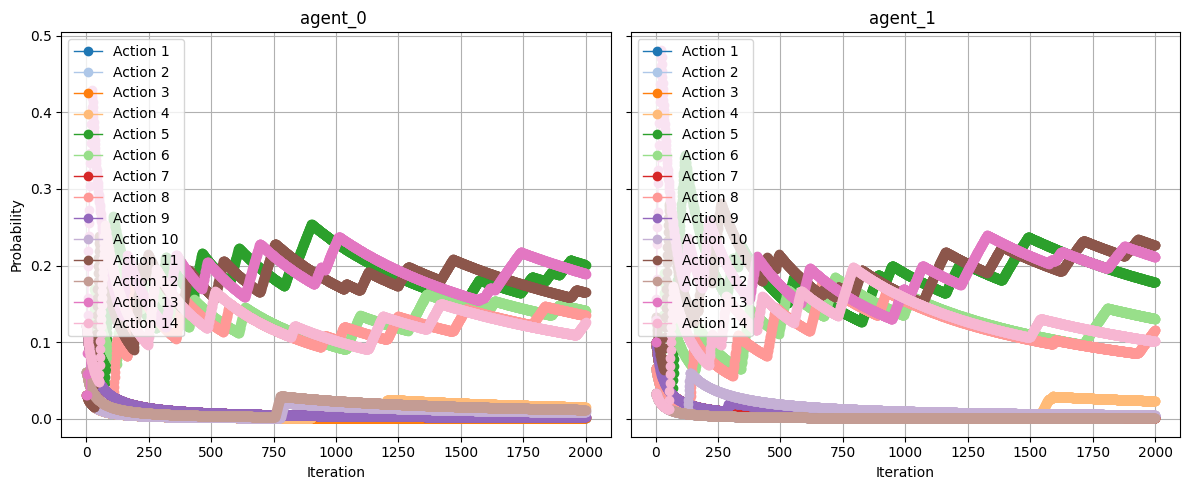

In [3]:
fp_agents = {agent: FictitiousPlay(game, agent, seed=1) for agent in agents}
policies, action_history = run_and_plot(fp_agents, game, num_iterations=2000, title_suffix="")

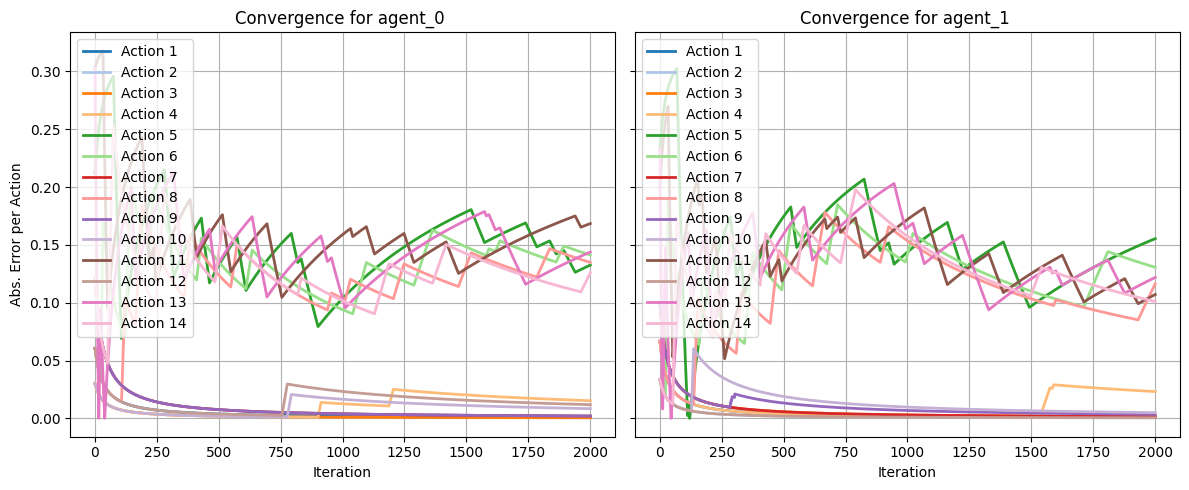

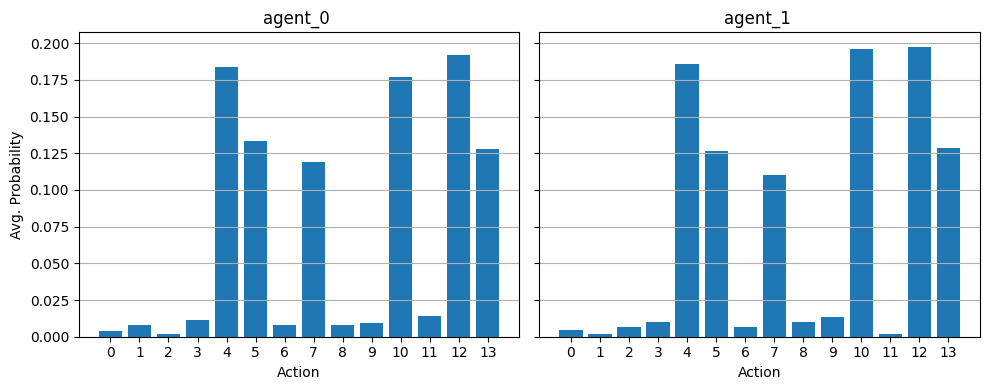

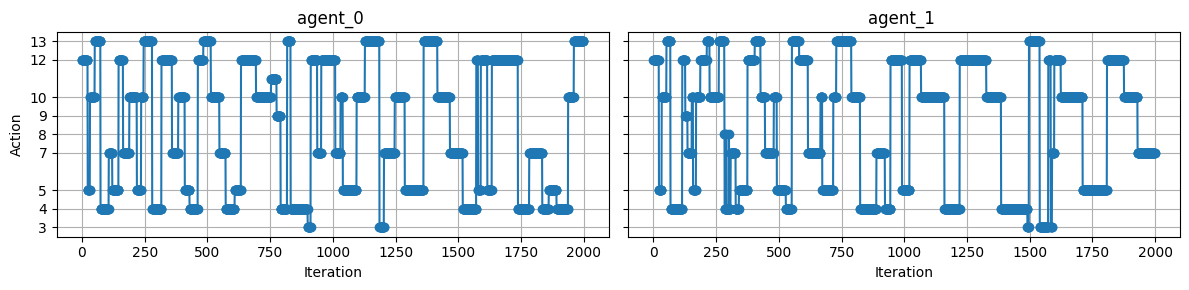

In [4]:
nash_equilibrium_S13 = {
    "agent_0": [0] * 14,  # Inicializar con ceros para todas las 14 acciones
    "agent_1": [0] * 14
}

# Asignar probabilidad de 1/3 a las acciones del equilibrio de Nash
nash_equilibrium_S13["agent_0"][4] = 1/3  # (1, 5, 7)
nash_equilibrium_S13["agent_0"][10] = 1/3 # (3, 3, 7)
nash_equilibrium_S13["agent_0"][12] = 1/3 # (3, 5, 5)

nash_equilibrium_S13["agent_1"][4] = 1/3  # (1, 5, 7)
nash_equilibrium_S13["agent_1"][10] = 1/3 # (3, 3, 7)
nash_equilibrium_S13["agent_1"][12] = 1/3 # (3, 5, 5)
plot_convergence_to_nash(policies, nash_equilibrium_S13)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [5]:
for agent in fp_agents:
    print(agent, fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in fp_agents:
    action = get_action_from_policy(fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.00098425 0.0019685  0.00049213 0.01525591 0.2007874  0.14124016
 0.0019685  0.13484252 0.0019685  0.00836614 0.1648622  0.01181102
 0.1894685  0.12598425]
agent_1 [0.00098571 0.00049285 0.00147856 0.02316412 0.17792016 0.13060621
 0.00147856 0.11631345 0.00344998 0.00492854 0.22621981 0.00049285
 0.2114342  0.10103499]
Action with high probability for agent_0: [1, 5, 7]
Action with high probability for agent_1: [3, 3, 7]


# Regret Matching vs Regret Matching

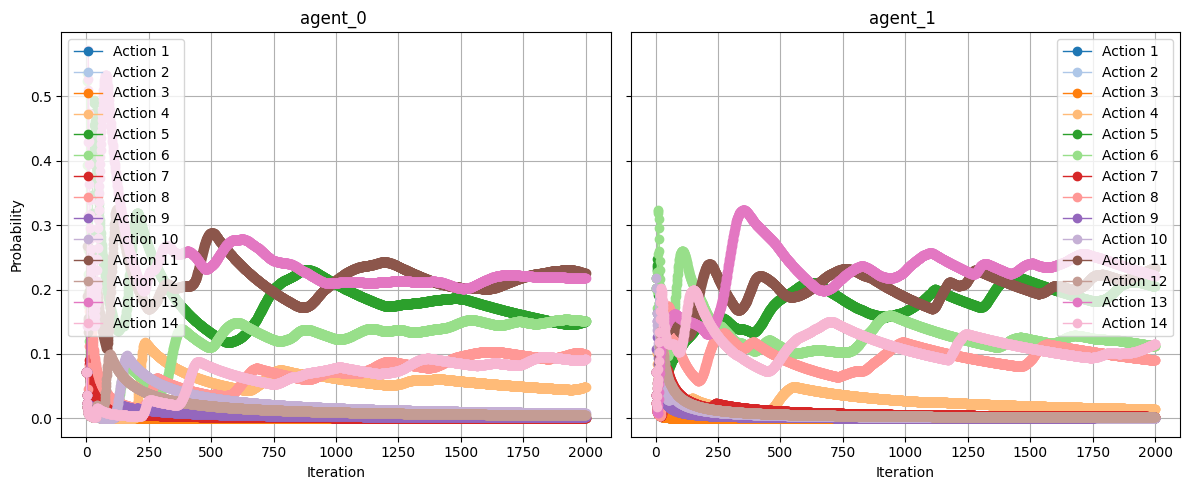

In [6]:
rm_agents = {agent: RegretMatching(game, agent, seed = 2) for agent in agents}
policies, action_history = run_and_plot(rm_agents, game, num_iterations=2000, title_suffix="")

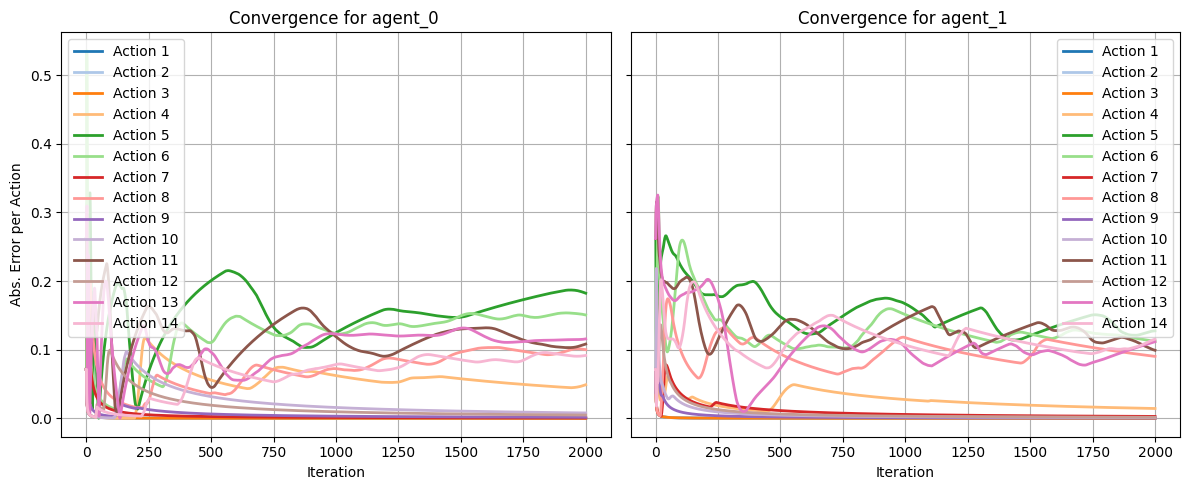

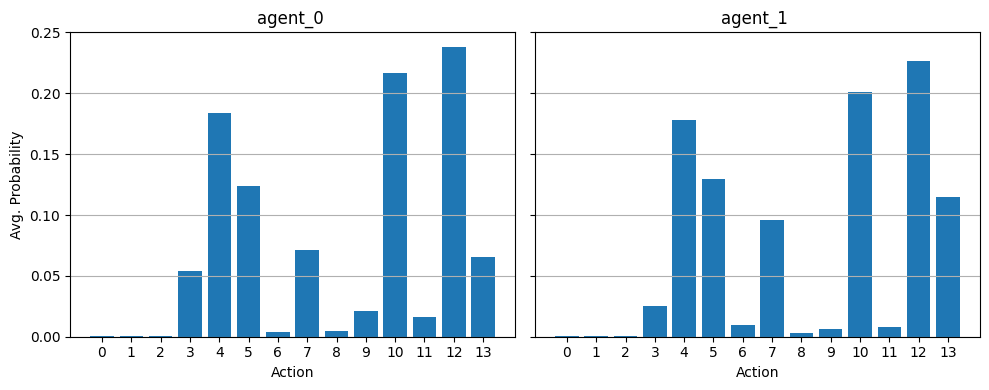

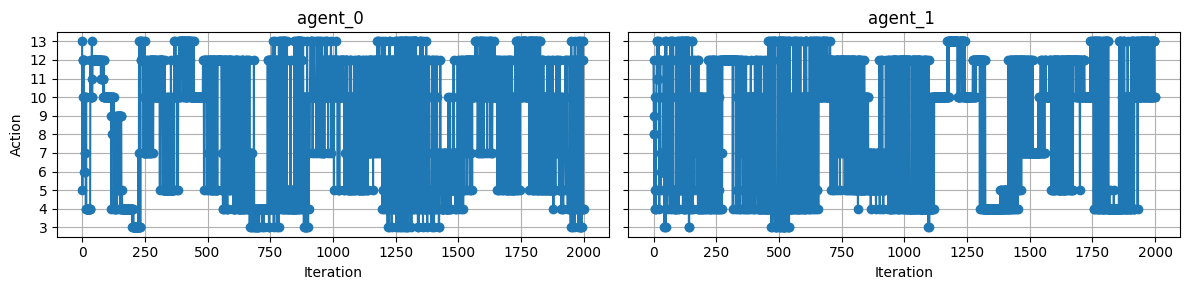

In [7]:
nash_equilibrium_S13 = {
    "agent_0": [0] * 14,  # Inicializar con ceros para todas las 14 acciones
    "agent_1": [0] * 14
}

# Asignar probabilidad de 1/3 a las acciones del equilibrio de Nash
nash_equilibrium_S13["agent_0"][4] = 1/3  # (1, 5, 7)
nash_equilibrium_S13["agent_0"][10] = 1/3 # (3, 3, 7)
nash_equilibrium_S13["agent_0"][12] = 1/3 # (3, 5, 5)

nash_equilibrium_S13["agent_1"][4] = 1/3  # (1, 5, 7)
nash_equilibrium_S13["agent_1"][10] = 1/3 # (3, 3, 7)
nash_equilibrium_S13["agent_1"][12] = 1/3 # (3, 5, 5)
plot_convergence_to_nash(policies, nash_equilibrium_S13)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [8]:
for agent in rm_agents:
    print(agent, rm_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_agents:
    action = get_action_from_policy(rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [3.57142857e-05 3.57142857e-05 3.57142857e-05 4.90041823e-02
 1.50977815e-01 1.50629785e-01 6.50595238e-04 1.00108963e-01
 1.59137463e-03 7.90938878e-03 2.25048895e-01 4.78447386e-03
 2.17541946e-01 9.16454376e-02]
agent_1 [3.57142857e-05 3.57142857e-05 3.57142857e-05 1.43660947e-02
 2.05810732e-01 1.12204879e-01 2.82983241e-03 9.03094814e-02
 4.72168857e-04 1.16712748e-03 2.34143118e-01 1.58958903e-03
 2.21592988e-01 1.15406846e-01]
Action with high probability for agent_0: [3, 3, 7]
Action with high probability for agent_1: [3, 3, 7]


# Fictitious Play vs Regret Matching

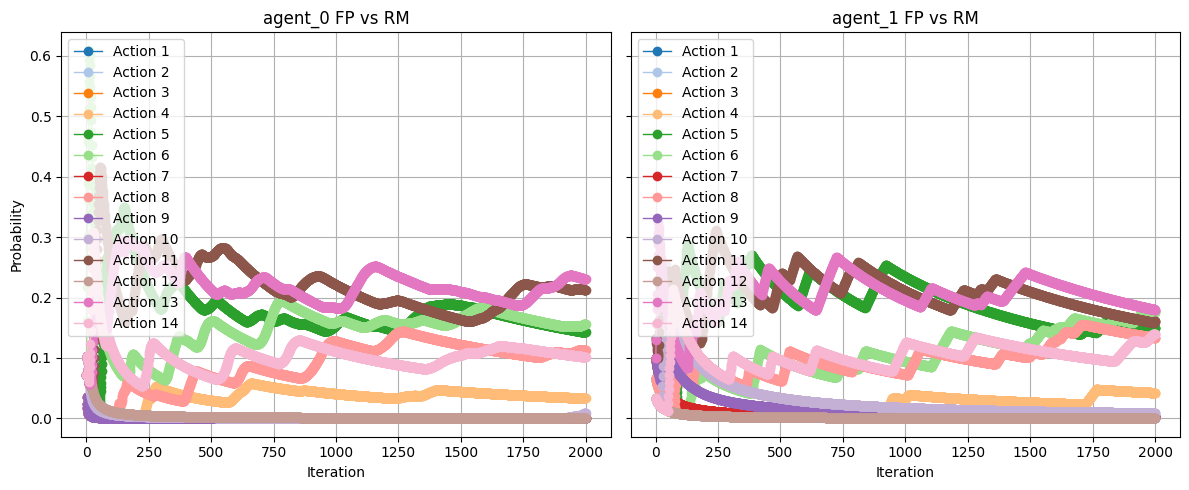

In [9]:
rm_vs_fp_agents = {agents[0]: RegretMatching(game=game, agent=agents[0], seed=1),
              agents[1]: FictitiousPlay(game=game, agent=agents[1], seed=1)}
policies, action_history = run_and_plot(rm_vs_fp_agents, game, num_iterations=2000, title_suffix="FP vs RM")

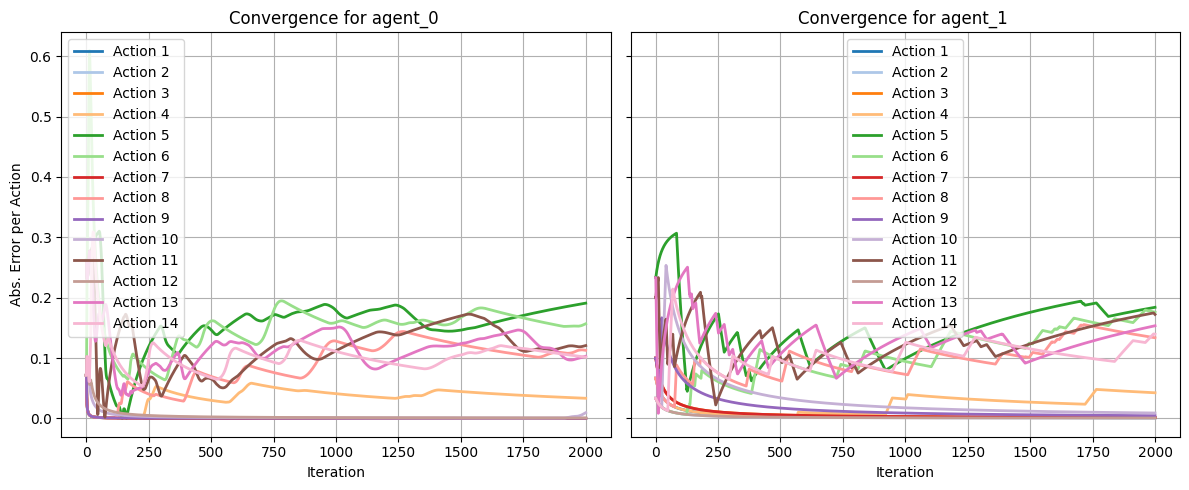

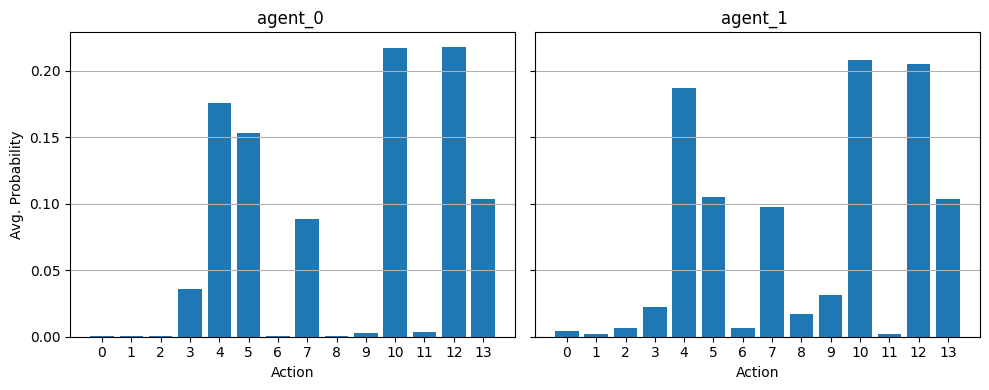

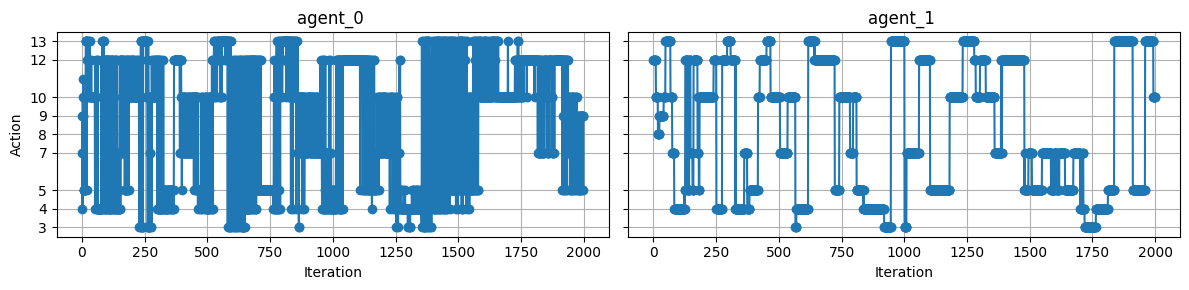

In [10]:
nash_equilibrium_S13 = {
    "agent_0": [0] * 14,  # Inicializar con ceros para todas las 14 acciones
    "agent_1": [0] * 14
}

# Asignar probabilidad de 1/3 a las acciones del equilibrio de Nash
nash_equilibrium_S13["agent_0"][4] = 1/3  # (1, 5, 7)
nash_equilibrium_S13["agent_0"][10] = 1/3 # (3, 3, 7)
nash_equilibrium_S13["agent_0"][12] = 1/3 # (3, 5, 5)

nash_equilibrium_S13["agent_1"][4] = 1/3  # (1, 5, 7)
nash_equilibrium_S13["agent_1"][10] = 1/3 # (3, 3, 7)
nash_equilibrium_S13["agent_1"][12] = 1/3 # (3, 5, 5)
plot_convergence_to_nash(policies, nash_equilibrium_S13)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [11]:
for agent in rm_vs_fp_agents:
    print(agent, rm_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_vs_fp_agents:
    action = get_action_from_policy(rm_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [3.57142857e-05 3.57142857e-05 3.57142857e-05 3.32963373e-02
 1.42428470e-01 1.56750316e-01 3.57142857e-05 1.12762702e-01
 3.57142857e-05 9.41095920e-03 2.12706936e-01 6.03297397e-04
 2.30345561e-01 1.01516850e-01]
agent_1 [0.00098571 0.00049285 0.00147856 0.04238541 0.14933465 0.17594874
 0.00147856 0.13356333 0.00443568 0.00887137 0.16116313 0.00049285
 0.17989157 0.13947758]
Action with high probability for agent_0: [3, 5, 5]
Action with high probability for agent_1: [3, 5, 5]


# Random Agent vs Random Agent

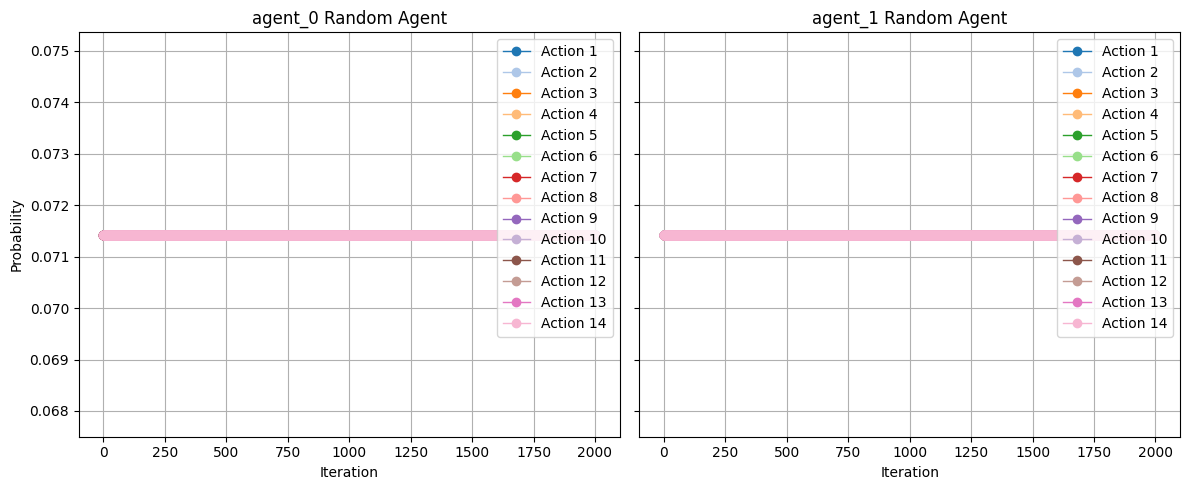

In [12]:
random_agents = {agent: RandomAgent(game, agent) for agent in agents}
policies, action_history = run_and_plot(random_agents, game, num_iterations=2000, title_suffix="Random Agent")

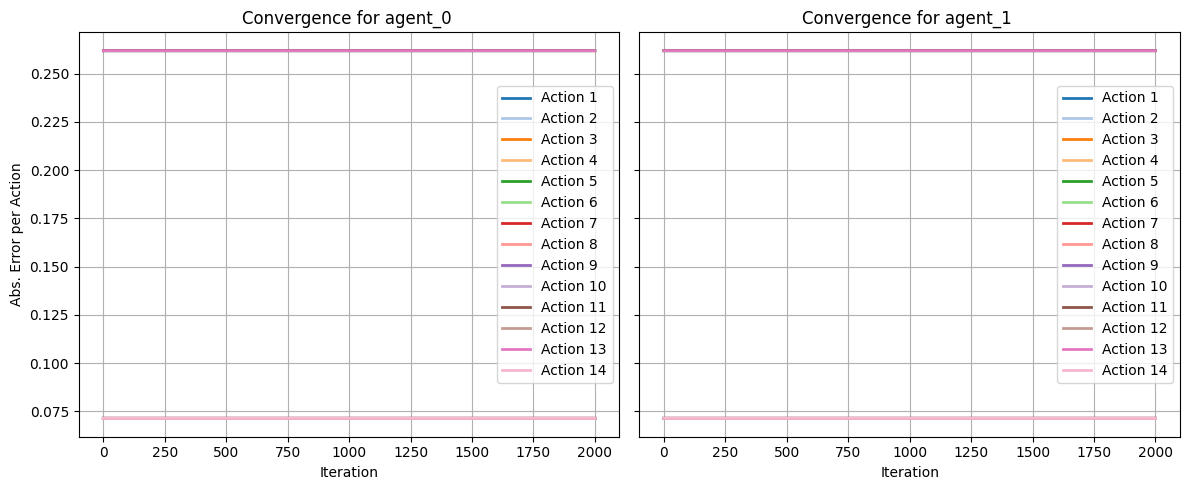

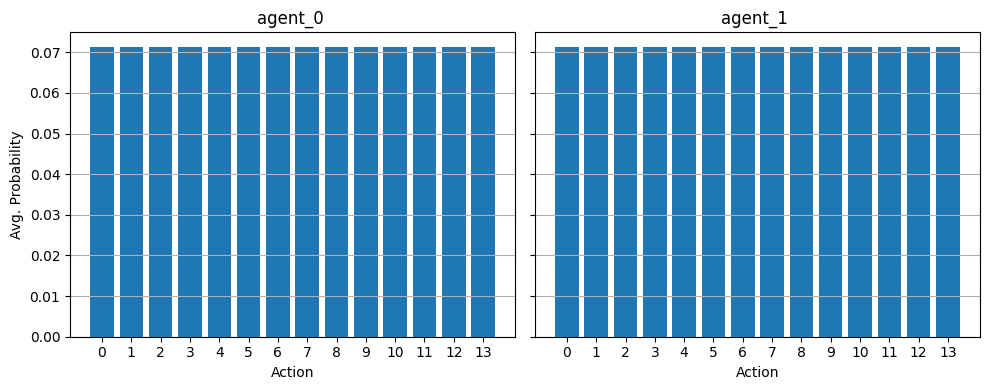

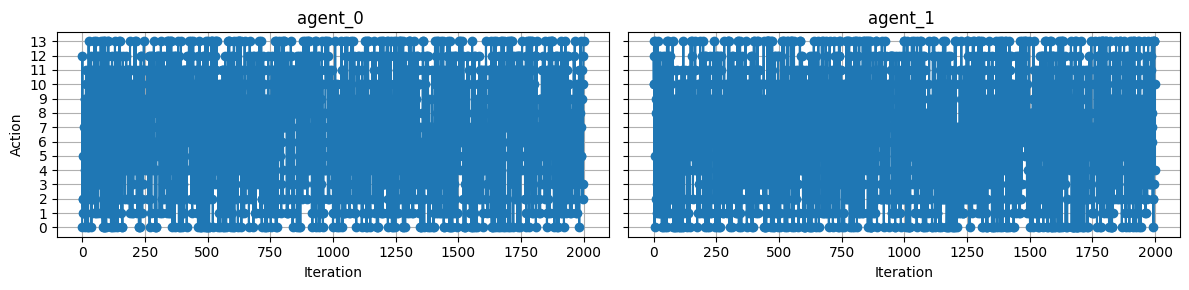

In [13]:
nash_equilibrium_S13 = {
    "agent_0": [0] * 14,  # Inicializar con ceros para todas las 14 acciones
    "agent_1": [0] * 14
}

# Asignar probabilidad de 1/3 a las acciones del equilibrio de Nash
nash_equilibrium_S13["agent_0"][4] = 1/3  # (1, 5, 7)
nash_equilibrium_S13["agent_0"][10] = 1/3 # (3, 3, 7)
nash_equilibrium_S13["agent_0"][12] = 1/3 # (3, 5, 5)

nash_equilibrium_S13["agent_1"][4] = 1/3  # (1, 5, 7)
nash_equilibrium_S13["agent_1"][10] = 1/3 # (3, 3, 7)
nash_equilibrium_S13["agent_1"][12] = 1/3 # (3, 5, 5)
plot_convergence_to_nash(policies, nash_equilibrium_S13)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


# Random Agent vs Fictitious Play

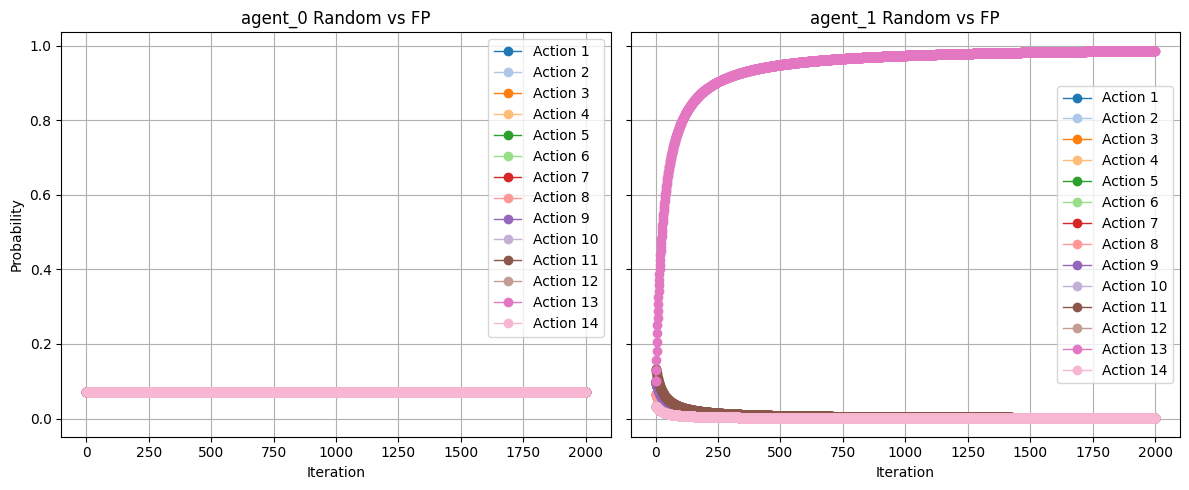

In [14]:
random_vs_fp_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                          agents[1]: FictitiousPlay(game=game, agent=agents[1], seed=1)}
policies, action_history = run_and_plot(random_vs_fp_agents, game, num_iterations=2000, title_suffix="Random vs FP")

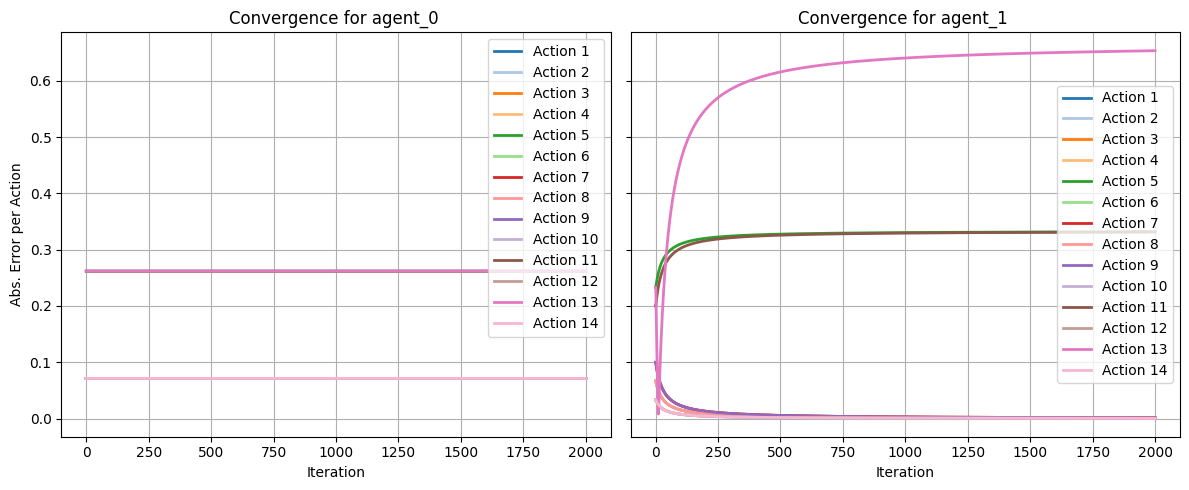

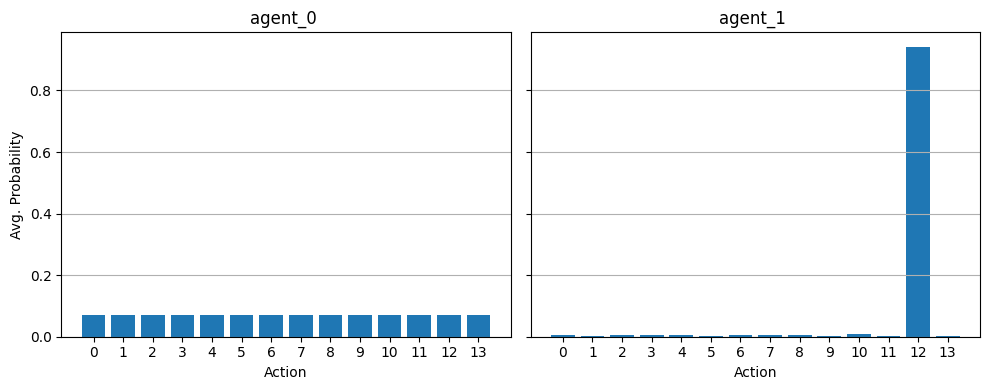

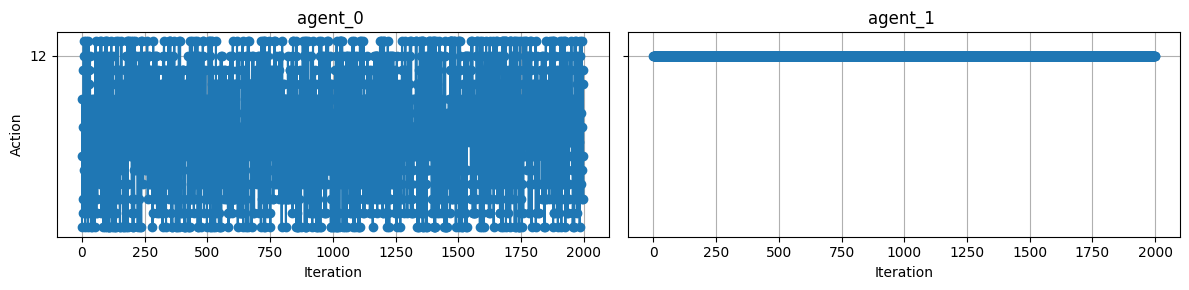

In [15]:
nash_equilibrium_S13 = {
    "agent_0": [0] * 14,  # Inicializar con ceros para todas las 14 acciones
    "agent_1": [0] * 14
}

# Asignar probabilidad de 1/3 a las acciones del equilibrio de Nash
nash_equilibrium_S13["agent_0"][4] = 1/3  # (1, 5, 7)
nash_equilibrium_S13["agent_0"][10] = 1/3 # (3, 3, 7)
nash_equilibrium_S13["agent_0"][12] = 1/3 # (3, 5, 5)

nash_equilibrium_S13["agent_1"][4] = 1/3  # (1, 5, 7)
nash_equilibrium_S13["agent_1"][10] = 1/3 # (3, 3, 7)
nash_equilibrium_S13["agent_1"][12] = 1/3 # (3, 5, 5)
plot_convergence_to_nash(policies, nash_equilibrium_S13)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [16]:
for agent in random_vs_fp_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_fp_agents:
    action = get_action_from_policy(random_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857]
agent_1 [9.85707245e-04 4.92853622e-04 1.47856087e-03 9.85707245e-04
 1.47856087e-03 4.92853622e-04 1.47856087e-03 9.85707245e-04
 1.47856087e-03 4.92853622e-04 1.97141449e-03 4.92853622e-04
 9.86692952e-01 4.92853622e-04]
Action with high probability for agent_0: [1, 1, 11]
Action with high probability for agent_1: [3, 5, 5]


# Random Agent vs Regret Matching


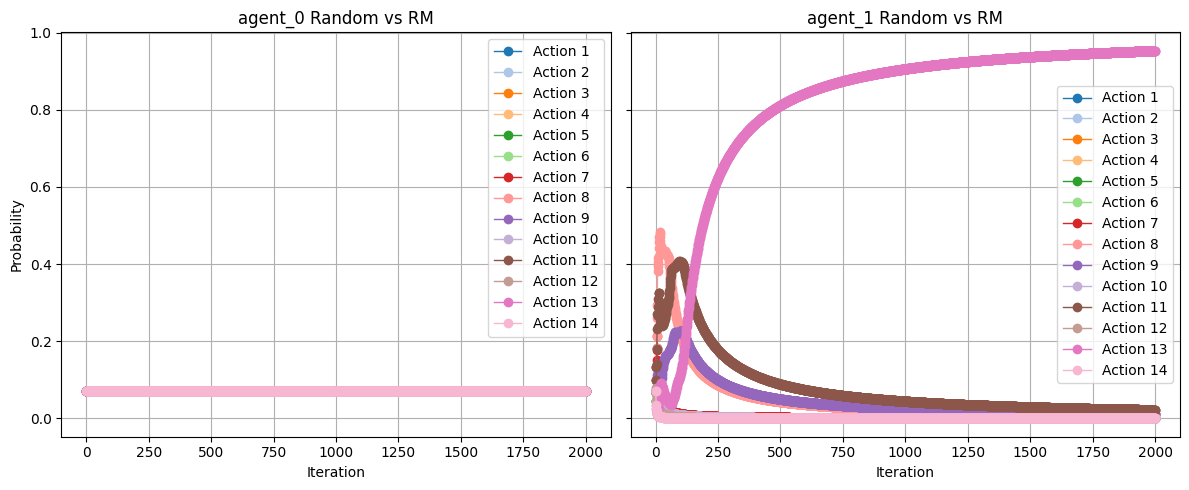

In [17]:
random_vs_rm_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                            agents[1]: RegretMatching(game=game, agent=agents[1], seed=1)}
policies, action_history = run_and_plot(random_vs_rm_agents, game, num_iterations=2000, title_suffix="Random vs RM")

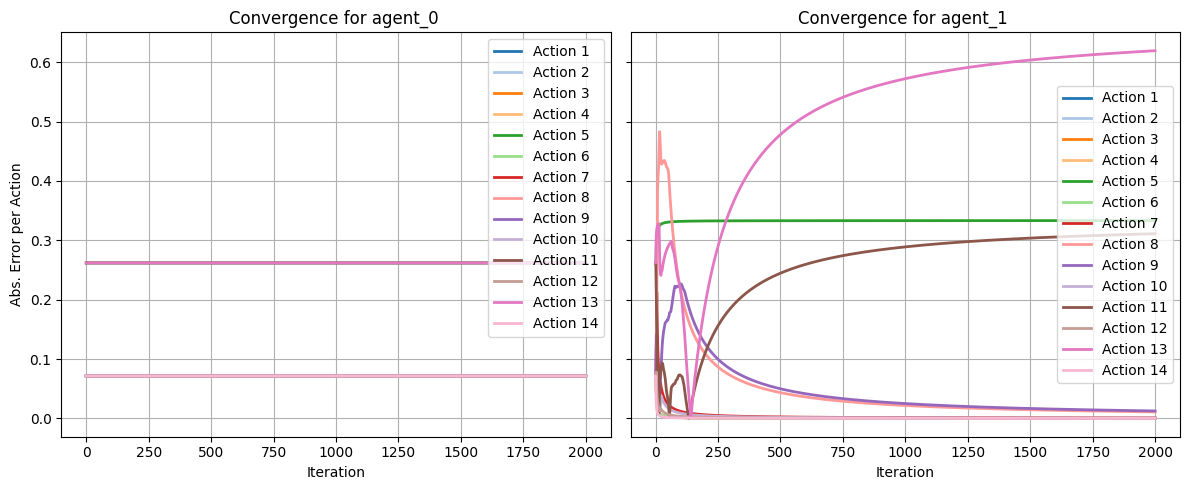

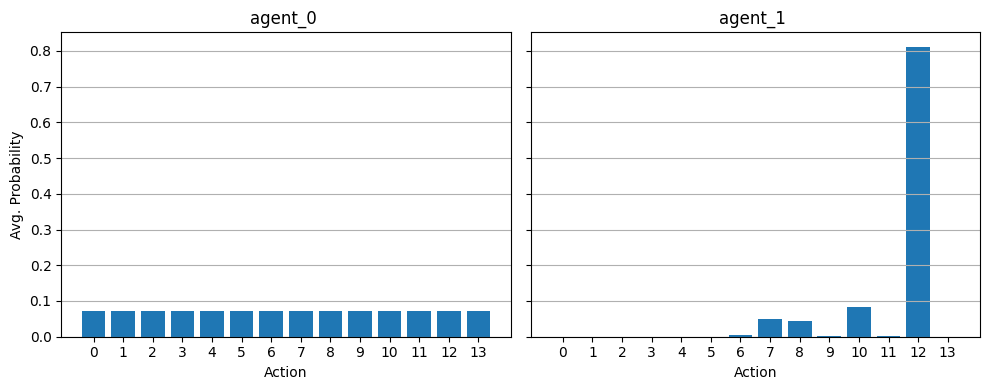

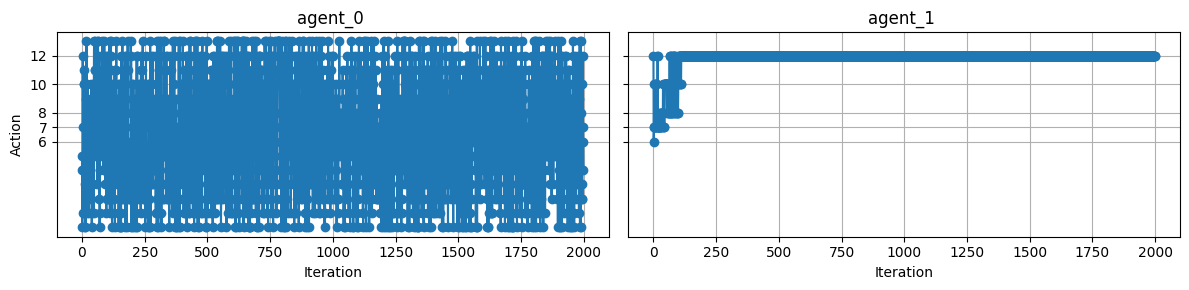

In [18]:
nash_equilibrium_S13 = {
    "agent_0": [0] * 14,  # Inicializar con ceros para todas las 14 acciones
    "agent_1": [0] * 14
}

# Asignar probabilidad de 1/3 a las acciones del equilibrio de Nash
nash_equilibrium_S13["agent_0"][4] = 1/3  # (1, 5, 7)
nash_equilibrium_S13["agent_0"][10] = 1/3 # (3, 3, 7)
nash_equilibrium_S13["agent_0"][12] = 1/3 # (3, 5, 5)

nash_equilibrium_S13["agent_1"][4] = 1/3  # (1, 5, 7)
nash_equilibrium_S13["agent_1"][10] = 1/3 # (3, 3, 7)
nash_equilibrium_S13["agent_1"][12] = 1/3 # (3, 5, 5)
plot_convergence_to_nash(policies, nash_equilibrium_S13)
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [19]:
for agent in random_vs_rm_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_rm_agents:
    action = get_action_from_policy(random_vs_rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857]
agent_1 [9.85707245e-04 4.92853622e-04 1.47856087e-03 9.85707245e-04
 1.47856087e-03 4.92853622e-04 1.47856087e-03 9.85707245e-04
 1.47856087e-03 4.92853622e-04 1.97141449e-03 4.92853622e-04
 9.86692952e-01 4.92853622e-04]
Action with high probability for agent_0: [1, 1, 11]
Action with high probability for agent_1: [3, 5, 5]


In [20]:
import numpy as np
from collections import defaultdict

# Todas las acciones posibles del juego
all_actions = [list(x) for x in game._moves]

def get_action_outcome(action1, action2):
    """
    Compara dos acciones y devuelve 'win', 'lose' o 'draw' dependiendo de 
    quién gana en al menos 2 de los 3 frentes.
    """
    wins = 0
    losses = 0

    for a1, a2 in zip(action1, action2):
        if a1 > a2:
            wins += 1
        elif a1 < a2:
            losses += 1

    if wins >= 2:
        return "win"
    elif losses >= 2:
        return "lose"
    else:
        return "draw"

# Diccionario para almacenar los resultados por acción
results_by_action = {}

for i, action in enumerate(all_actions):
    outcomes = [get_action_outcome(action, opponent)
                for j, opponent in enumerate(all_actions) if j != i]

    outcomes_count = {
        "win": outcomes.count("win"),
        "lose": outcomes.count("lose"),
        "draw": outcomes.count("draw")
    }

    total = len(outcomes)
    outcomes_percentage = {
        "win": f"{(outcomes_count['win'] / total) * 100:.1f}%",
        "draw": f"{(outcomes_count['draw'] / total) * 100:.1f}%",
        "lose": f"{(outcomes_count['lose'] / total) * 100:.1f}%"
    }

    results_by_action[tuple(action)] = {
        "index": i,
        "outcomes": outcomes_count,
        "percentages": outcomes_percentage
    }

# Imprimir resumen
for action, info in results_by_action.items():
    print(f"Action {info['index']} ({action}):")
    print(f"  Resultados: {info['outcomes']}")
    print(f"  Porcentajes: {info['percentages']}")
    print("-" * 40)


Action 0 ((1, 1, 11)):
  Resultados: {'win': 0, 'lose': 8, 'draw': 5}
  Porcentajes: {'win': '0.0%', 'draw': '38.5%', 'lose': '61.5%'}
----------------------------------------
Action 1 ((1, 2, 10)):
  Resultados: {'win': 0, 'lose': 7, 'draw': 6}
  Porcentajes: {'win': '0.0%', 'draw': '46.2%', 'lose': '53.8%'}
----------------------------------------
Action 2 ((1, 3, 9)):
  Resultados: {'win': 0, 'lose': 5, 'draw': 8}
  Porcentajes: {'win': '0.0%', 'draw': '61.5%', 'lose': '38.5%'}
----------------------------------------
Action 3 ((1, 4, 8)):
  Resultados: {'win': 1, 'lose': 3, 'draw': 9}
  Porcentajes: {'win': '7.7%', 'draw': '69.2%', 'lose': '23.1%'}
----------------------------------------
Action 4 ((1, 5, 7)):
  Resultados: {'win': 2, 'lose': 2, 'draw': 9}
  Porcentajes: {'win': '15.4%', 'draw': '69.2%', 'lose': '15.4%'}
----------------------------------------
Action 5 ((1, 6, 6)):
  Resultados: {'win': 2, 'lose': 4, 'draw': 7}
  Porcentajes: {'win': '15.4%', 'draw': '53.8%', 'los